<a href="https://colab.research.google.com/github/Celine96/portfolio/blob/main/Men_Fragrance_product_analysis(Sephora).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sephora Products and Skincare Reviews

## 뷰티쪽 신제품을 낸다고 했을때 어떤 프로덕트로 공략해야할까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [2]:
product = pd.read_csv('/content/drive/MyDrive/portfolio/data/sephora/product_info.csv')
product

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [3]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [4]:
product.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [5]:
product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
product.primary_category.unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [7]:
product.primary_category.value_counts()

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

In [8]:
#pandas에서 sql 사용하기

Path('product.db').touch()
product_conn = sqlite3.connect('product.db')
product_cursor = product_conn.cursor()

In [9]:
product_conn

In [10]:
product.to_sql('product', product_conn, if_exists='append', index=False)

8494

In [11]:
product_init_query = pd.read_sql(''' select * from product ''', product_conn)
product_init_query

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,None,None,None,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,None,None,None,...,0,0,0,None,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,None,None,None,...,1,1,0,None,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,None,None,None,...,1,0,0,None,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


# product category별 product갯수

### 1.전체적으로 `skincare`와 `makeup`이 압도적으로 많고 다양하다

In [12]:
query1 = pd.read_sql(''' select primary_category, count(product_id) as product_count
                         from product
                         group by primary_category
                         order by product_count desc ''', product_conn)
query1

,primary_category,product_count
0,Skincare,2420
1,Makeup,2369
2,Hair,1464
3,Fragrance,1432
4,Bath & Body,405
5,Mini Size,288
6,Men,60
7,Tools & Brushes,52
8,Gifts,4


<Axes: xlabel='product_count', ylabel='primary_category'>

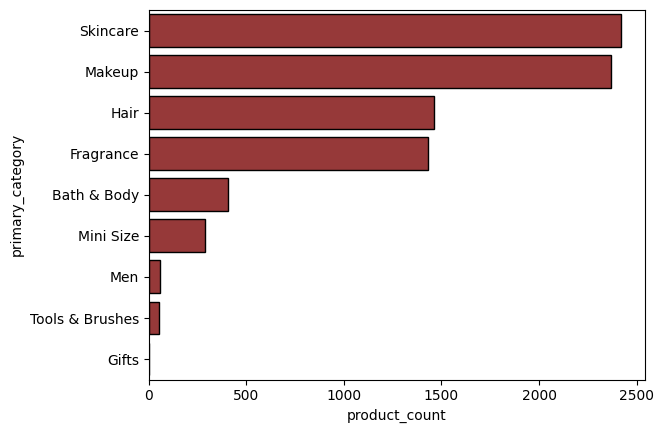

In [13]:
sns.barplot(x= 'product_count', y= 'primary_category', data=query1, color='brown',edgecolor='black')

In [14]:
query2 = pd.read_sql(''' select secondary_category, count(product_id) as product_count
                         from product
                         group by secondary_category
                         order by product_count desc ''', product_conn)
query2

,secondary_category,product_count
0,Women,875
1,Hair Styling & Treatments,757
2,Eye,711
3,Face,659
4,Moisturizers,551
5,Value & Gift Sets,498
6,Treatments,466
7,Shampoo & Conditioner,431
8,Lip,411
9,Cleansers,361


<Axes: xlabel='product_count', ylabel='secondary_category'>

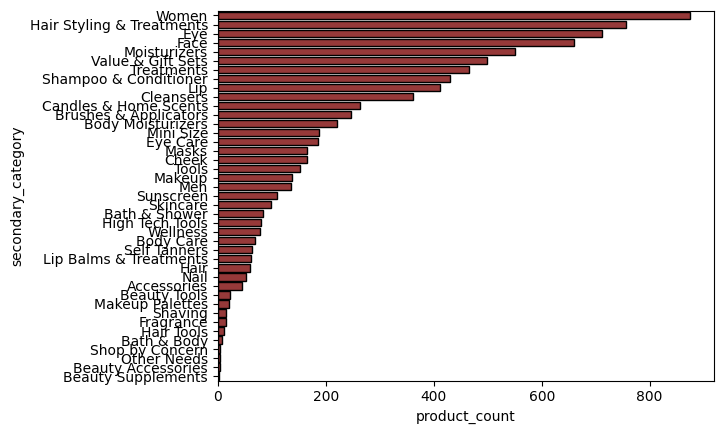

In [ ]:
sns.barplot(x= 'product_count', y= 'secondary_category', data=query2, color='brown',edgecolor='black')

In [ ]:
product.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
query = pd.read_sql(''' select primary_category	, avg(reviews) as reviews, avg(rating) as rating
                         from product
                         group by primary_category
                         order by reviews desc ''', product_conn)
query

,primary_category,reviews,rating
0,Mini Size,719.047445,4.005665
1,Makeup,681.998282,4.146845
2,Skincare,463.872395,4.228890
3,Fragrance,266.232263,4.230889
4,Hair,253.902542,4.201113
5,Tools & Brushes,220.080000,4.271458
6,Bath & Body,198.992405,4.195015
7,Men,72.711864,4.504992
8,Gifts,17.000000,4.563450


# Men product로 한번 봐보자
## 틈새시장
주변만 봐도 소비력이 강한 2030사이에서
선물로 향수를 주는 경험
주변에 스킨케어에 대한 수요는 늘고  있다

men 프로덕트가 틈세 시장이지 않을까?라는 가설


## 질문1. Men의 인기 product 카테고리는 무엇일까?
- 20후반 30의 소비 욕구 `향수(향)<차<집`이라고 함. 수요가 많고(=다양한 프로덕트를 갖고 있고) 매출이 가장 높은 `화장품`일 것이다.

- 각 카테고리별 베스트 rating brand
- 카테고리별 리뷰



## 질문2. 가장 수요가 많은 제품의 성분 분석

### Men의 인기 product 카테고리?

In [15]:
men = pd.read_sql(''' select *
                         from product
                         where primary_category = 'Men'
                         or secondary_category = 'Men'   ''', product_conn)
men

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P163604,Colonia,5847,Acqua di Parma,4157,4.2125,80.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Cologne Spray,...,1,0,0,"['Unisex/ Genderless Scent', 'Fresh Scent']",Fragrance,Men,Cologne,0,NaN,NaN
1,P377678,Oud Eau de Parfum,5847,Acqua di Parma,1775,4.2632,19.0,3.4 oz/ 100 mL,Size,3.4 oz/ 100 mL,...,1,0,0,None,Fragrance,Men,Cologne,0,NaN,NaN
2,P269110,Colonia Essenza,5847,Acqua di Parma,1638,4.5333,15.0,1.7 oz/ 50 mL,Size + Concentration + Formulation,1.7 oz/ 50 mL,...,1,0,0,None,Fragrance,Men,Cologne,1,181.0,181.0
3,P12430,Acqua di Giò Eau de Toilette Spray,1517,Armani Beauty,29888,4.7410,1726.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Toilette Spray,...,0,0,0,None,Fragrance,Men,Cologne,4,185.0,42.0
4,P398665,Acqua Di Gio Profumo,1517,Armani Beauty,9322,4.6604,53.0,4.2 oz,Size + Concentration + Formulation,4.2 oz Parfum Spray,...,0,1,0,None,Fragrance,Men,Cologne,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,P500062,Y Eau de Toilette,1070,Yves Saint Laurent,6095,4.7365,1203.0,3.4 oz / 100 mL,Size + Concentration + Formulation,3.4 oz / 100 mL eau de toilette spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,98.0,98.0
191,P383083,L’Homme Parfum Intense,1070,Yves Saint Laurent,4369,4.5795,88.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL Eau de Parfum Spray,...,0,1,0,None,Fragrance,Men,Cologne,0,NaN,NaN
192,P460446,L'Homme Le Parfum,1070,Yves Saint Laurent,3812,5.0000,6.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL,...,0,0,0,None,Fragrance,Men,Cologne,1,119.0,119.0
193,P457262,Y Eau Fraiche,1070,Yves Saint Laurent,3089,4.7333,150.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Spray,...,0,1,0,"['Fresh Scent', 'Layerable Scent']",Fragrance,Men,Cologne,0,NaN,NaN


In [16]:
query3 = pd.read_sql(''' select primary_category, secondary_category, count(product_id) as product_count
                         from (select *
                         from product
                         where primary_category = 'Men'
                         or secondary_category = 'Men' )
                         group by secondary_category
                         order by product_count desc ''', product_conn)
query3

,primary_category,secondary_category,product_count
0,Fragrance,Men,135
1,Men,Skincare,32
2,Men,Shaving,15
3,Men,Other Needs,5
4,Men,Value & Gift Sets,4
5,Men,Hair,3
6,Men,None,1


In [17]:
query3.loc[0,'secondary_category']='Fragrance'
query3.loc[0,'primary_category']='Men'
query3 #전처리

,primary_category,secondary_category,product_count
0,Men,Fragrance,135
1,Men,Skincare,32
2,Men,Shaving,15
3,Men,Other Needs,5
4,Men,Value & Gift Sets,4
5,Men,Hair,3
6,Men,None,1


## 질문1. Men의 인기 product 카테고리는 무엇일까?
## 가설. 20후반 30의 소비 욕구 `향수(향)<차<집`이라고 함. 수요가 많고(=다양한 프로덕트를 갖고 있고) 매출이 가장 높은 화장품은 `향수`일 것이다.
 > total sales가 좀더 직관적인 지표일 테지만, 지금 데이터에서는 다양한 프로덕트는 수요를 반증한다고 봐도 무방.

 > 실질적으로 `향수`와 `스킨케어` 제품 종류가 270개, 64개로 해당 카테고리가 시중에 많이 나와있는 제품이다.

<Axes: xlabel='product_count', ylabel='secondary_category'>

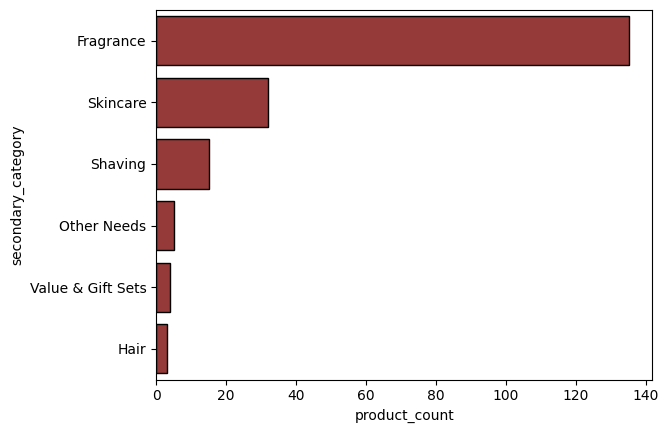

In [18]:
sns.barplot(x= 'product_count', y= 'secondary_category', data=query3, color='brown',edgecolor='black')

In [19]:
#데이터 전처리
men=men.replace({'secondary_category':'Men'},'Fragrance')
men=men.replace({'primary_category':'Fragrance'},'Men')
men

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P163604,Colonia,5847,Acqua di Parma,4157,4.2125,80.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Cologne Spray,...,1,0,0,"['Unisex/ Genderless Scent', 'Fresh Scent']",Men,Fragrance,Cologne,0,NaN,NaN
1,P377678,Oud Eau de Parfum,5847,Acqua di Parma,1775,4.2632,19.0,3.4 oz/ 100 mL,Size,3.4 oz/ 100 mL,...,1,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
2,P269110,Colonia Essenza,5847,Acqua di Parma,1638,4.5333,15.0,1.7 oz/ 50 mL,Size + Concentration + Formulation,1.7 oz/ 50 mL,...,1,0,0,None,Men,Fragrance,Cologne,1,181.0,181.0
3,P12430,Acqua di Giò Eau de Toilette Spray,1517,Armani Beauty,29888,4.7410,1726.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Toilette Spray,...,0,0,0,None,Men,Fragrance,Cologne,4,185.0,42.0
4,P398665,Acqua Di Gio Profumo,1517,Armani Beauty,9322,4.6604,53.0,4.2 oz,Size + Concentration + Formulation,4.2 oz Parfum Spray,...,0,1,0,None,Men,Fragrance,Cologne,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,P500062,Y Eau de Toilette,1070,Yves Saint Laurent,6095,4.7365,1203.0,3.4 oz / 100 mL,Size + Concentration + Formulation,3.4 oz / 100 mL eau de toilette spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Men,Fragrance,Cologne,1,98.0,98.0
191,P383083,L’Homme Parfum Intense,1070,Yves Saint Laurent,4369,4.5795,88.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL Eau de Parfum Spray,...,0,1,0,None,Men,Fragrance,Cologne,0,NaN,NaN
192,P460446,L'Homme Le Parfum,1070,Yves Saint Laurent,3812,5.0000,6.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL,...,0,0,0,None,Men,Fragrance,Cologne,1,119.0,119.0
193,P457262,Y Eau Fraiche,1070,Yves Saint Laurent,3089,4.7333,150.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Spray,...,0,1,0,"['Fresh Scent', 'Layerable Scent']",Men,Fragrance,Cologne,0,NaN,NaN


In [20]:
men.secondary_category.unique()

array(['Fragrance', 'Skincare', 'Value & Gift Sets', 'Shaving', None,
       'Other Needs', 'Hair'], dtype=object)

In [21]:
men.primary_category.unique()

array(['Men'], dtype=object)

In [22]:
men.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [23]:
df_men = men

In [24]:
Path('df_men.db').touch()

In [25]:
men_product_conn = sqlite3.connect('df_men.db')
men_product_cursor = men_product_conn.cursor()

In [26]:
men.to_sql('df_men', men_product_conn, if_exists='append', index=False)

195

In [27]:
men_product_conn.execute("select * from df_men")

In [28]:
query5 = pd.read_sql(''' select secondary_category	, avg(reviews) as reviews, avg(rating) as rating
                         from df_men
                         group by secondary_category
                         order by reviews desc ''', men_product_conn)
query5

,secondary_category,reviews,rating
0,None,351.000000,4.646700
1,Fragrance,318.750000,4.548450
2,Shaving,81.071429,4.641243
3,Skincare,77.281250,4.484609
4,Other Needs,48.000000,4.682980
5,Hair,19.000000,4.312500
6,Value & Gift Sets,8.500000,4.077625


## men product 세분화 분석


## review와 가장 다양한 제품을 갖고 있는 카테고리 Fragrance product analyst

In [29]:
men_Frgrance = pd.read_sql(''' select *
                         from df_men
                         where secondary_category = 'Fragrance'
                         order by reviews desc ''', men_product_conn)
men_Frgrance

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P436005,Y Eau de Parfum,1070,Yves Saint Laurent,28016,4.5523,2848.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Parfum Spray,...,0,0,0,['Woody & Earthy Scent'],Men,Fragrance,Cologne,2,199.0,123.0
1,P474083,Ralph's Club Eau de Parfum,1164,Ralph Lauren,4047,4.7908,2576.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Parfum Spray,...,0,0,0,None,Men,Fragrance,Cologne,3,98.0,34.0
2,P408252,Polo Blue Eau de Parfum,1164,Ralph Lauren,3251,4.4118,2013.0,1.36 oz,Size + Concentration + Formulation,1.36 oz Eau de Parfum Spray,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
3,P12430,Acqua di Giò Eau de Toilette Spray,1517,Armani Beauty,29888,4.7410,1726.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Toilette Spray,...,0,0,0,None,Men,Fragrance,Cologne,4,185.0,42.0
4,P455023,Homme Eau de Toilette,1073,Dior,6996,4.4810,1237.0,1.7 oz/ 50 mL,Size + Concentration + Formulation,1.7 oz/ 50 mL Eau de Toilette Spray,...,0,0,0,None,Men,Fragrance,Cologne,2,155.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,P464219,BLEU DE CHANEL Parfum Twist & Spray,1065,CHANEL,2043,5.0000,2.0,3 x 0.7 oz/ 20.7 mL,Size,3 x 0.7 oz/ 20.7 mL,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
131,P479695,BLEU DE CHANEL After Shave Lotion,1065,CHANEL,1040,1.0000,1.0,3.4 oz,Size + Concentration + Formulation,3.4 oz After Shave Lotion,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
132,P505121,Bad Boy Extreme Eau de Parfum,3155,Carolina Herrera,507,NaN,NaN,3.4 oz / 100 mL,Size + Concentration + Formulation,3.4 oz / 100 mL eau de parfum spray,...,1,0,0,"['Layerable Scent', 'Warm &Spicy Scent']",Men,Fragrance,Cologne,1,96.0,96.0
133,P504679,1 Million Eau de Toilette Travel Spray,1071,Paco Rabanne,17,NaN,NaN,0.5 oz / 15 ml,Size + Concentration + Formulation,0.5 oz / 15 ml eau de toilette spray,...,0,0,0,"['Layerable Scent', 'Warm &Spicy Scent']",Men,Fragrance,Cologne,0,NaN,NaN


In [30]:
men_Frgrance.isnull().sum()

product_id              0
product_name            0
brand_id                0
brand_name              0
loves_count             0
rating                  3
reviews                 3
size                    0
variation_type          0
variation_value         0
variation_desc        135
ingredients             0
price_usd               0
value_price_usd       133
sale_price_usd        135
limited_edition         0
new                     0
online_only             0
out_of_stock            0
sephora_exclusive       0
highlights             97
primary_category        0
secondary_category      0
tertiary_category       0
child_count             0
child_max_price        31
child_min_price        31
dtype: int64

## rating과 like의 상관관계 파악

- rating : The average rating of the product based on user reviews

- reviews : The number of user reviews for the product

- loves_count : The number of people who have marked this product as a favorite


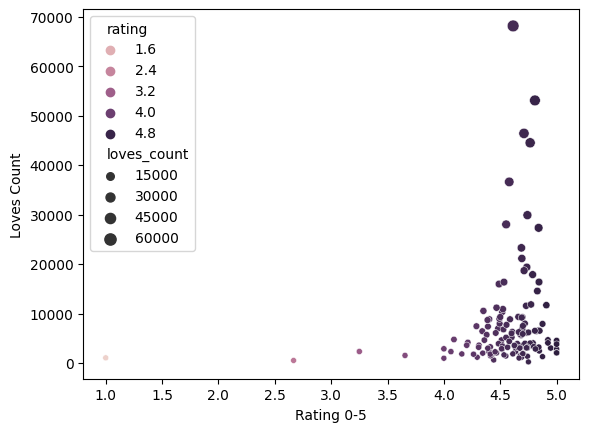

In [31]:
sns.scatterplot(x='rating', y='loves_count', data=men_Frgrance, size='loves_count', hue='rating', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Loves Count')
plt.show()

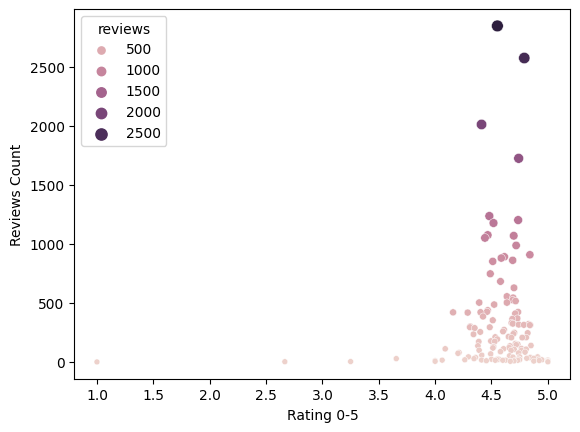

In [ ]:
sns.scatterplot(x='rating', y='reviews', data=men_Frgrance, size='reviews', hue='reviews', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Reviews Count')
plt.show()

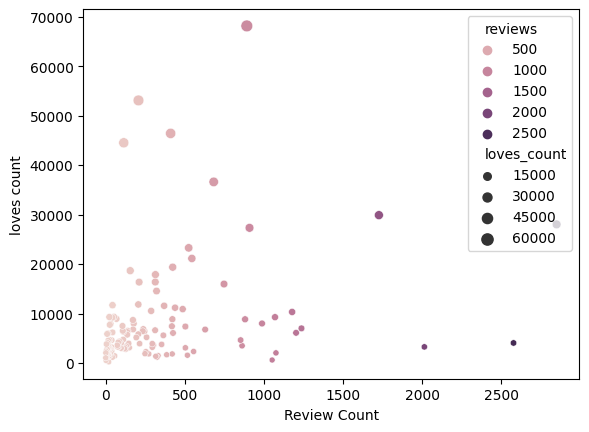

In [ ]:
sns.scatterplot(x='reviews', y='loves_count', data=men_Frgrance, size='loves_count', hue='reviews', legend=True)

plt.xlabel('Review Count')
plt.ylabel('loves count')
plt.show()

가격은 80-150 달러 사이 프로덕트가 많이 포진되어 있고, love count도 많다.

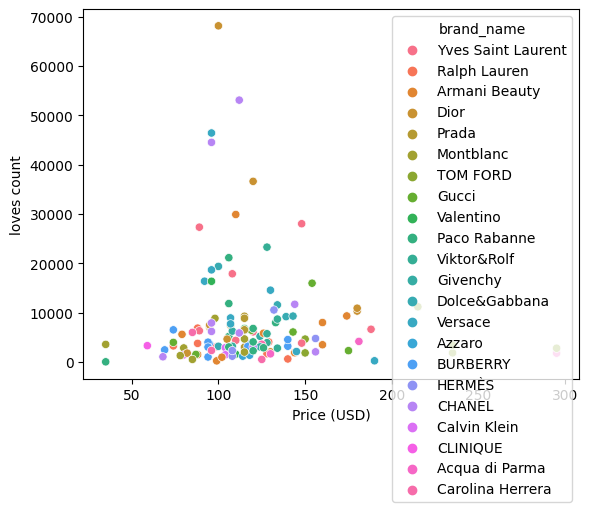

In [ ]:
sns.scatterplot(x='price_usd', y='loves_count', data=men_Frgrance, hue='brand_name', legend=True)

plt.xlabel('Price (USD)')
plt.ylabel('loves count')
plt.show()

### 브랜드별 가격 포진

100달러에 많이 포진되어 있음을 알 수 있다.

<Axes: xlabel='price_usd', ylabel='brand_name'>

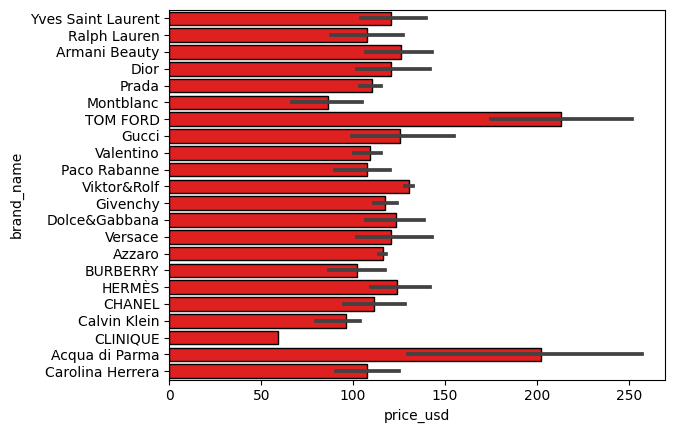

In [ ]:
sns.barplot(x= 'price_usd', y= 'brand_name', data=men_Frgrance, color='red',edgecolor='black')

love count를 가장 많이 받은 3브랜드 `Dior>Chanel>Versace` 또한 100달러 범위안에 들어간다

<Axes: xlabel='loves_count', ylabel='brand_name'>

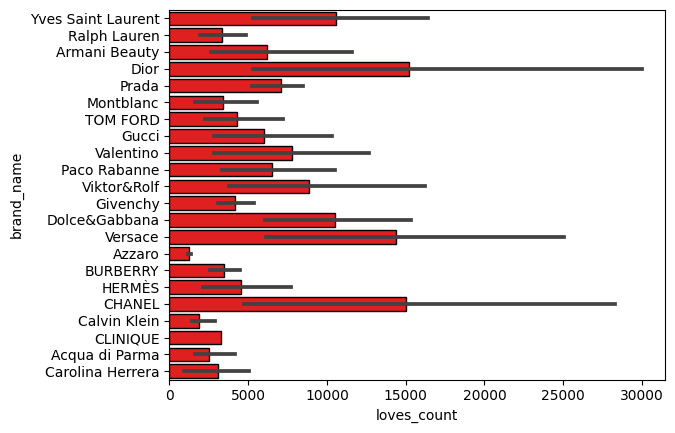

In [ ]:
sns.barplot(x= 'loves_count', y= 'brand_name', data=men_Frgrance, color='red',edgecolor='black')

### 가장 인기 있는 브랜드 프로덕트 top 15 (rating기준)

In [34]:
query5 = pd.read_sql(''' select product_name, brand_name, tertiary_category,	highlights, reviews, rating, price_usd
                         from ( select *
                         from df_men
                         where secondary_category = 'Fragrance'
                        )
                         order by rating desc
                         limit 15 ''', men_product_conn)
query5

,product_name,brand_name,tertiary_category,highlights,reviews,rating,price_usd
0,Mr. Burberry Eau de Parfum,BURBERRY,Cologne,"['Woody & Earthy Scent', 'Layerable Scent']",17.0,5.0000,140.0
1,BLEU DE CHANEL Parfum Twist & Spray,CHANEL,Cologne,None,2.0,5.0000,156.0
2,Fougère d'Argent,TOM FORD,Cologne,None,9.0,5.0000,295.0
3,Eros Parfum,Versace,Cologne,None,7.0,5.0000,145.0
4,L'Homme Le Parfum,Yves Saint Laurent,Cologne,None,6.0,5.0000,148.0
5,Invictus Legend,Paco Rabanne,Cologne,None,19.0,4.9474,106.0
6,Explorer Eau de Parfum,Montblanc,Cologne,None,26.0,4.9231,115.0
7,Invictus Victory,Paco Rabanne,Cologne,None,13.0,4.9231,120.0
8,BLEU DE CHANEL PARFUM,CHANEL,Cologne,None,44.0,4.9091,144.0
9,ALLURE HOMME SPORT Eau de Toilette,CHANEL,Cologne,None,32.0,4.8750,96.0


<Axes: xlabel='rating', ylabel='product_name'>

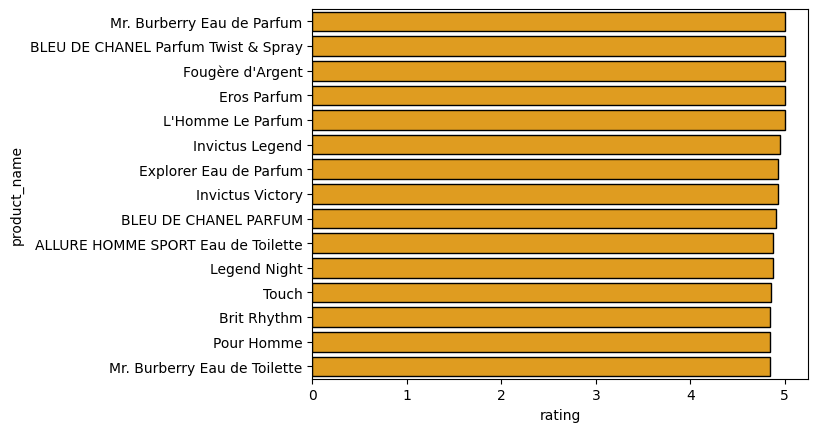

In [35]:
sns.barplot(x= 'rating', y= 'product_name', data=query5, color='orange',edgecolor='black')

### 가장 인기있는 top 15 남자 향(none 제외)

<Axes: xlabel='rating', ylabel='highlights'>

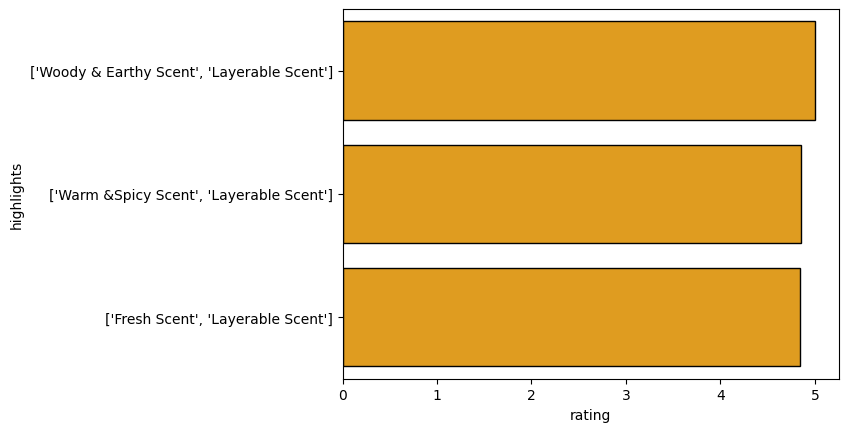

In [ ]:
sns.barplot(x= 'rating', y= 'highlights', data=query5, color='orange',edgecolor='black')

### 가장 인기있는 top 15 남자 향수 브랜드 rating 확인

<Axes: xlabel='rating', ylabel='brand_name'>

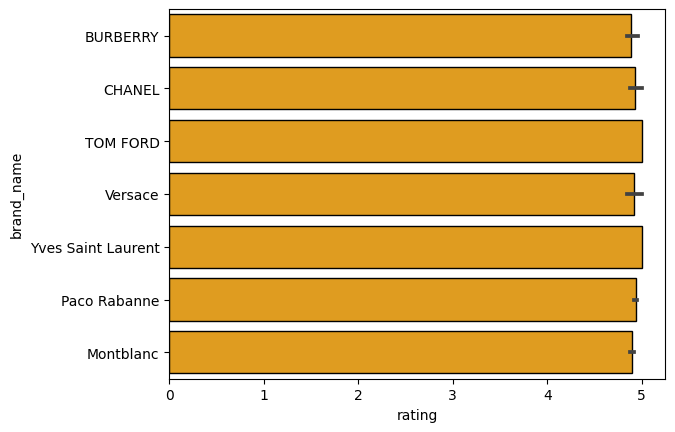

In [36]:
sns.barplot(x= 'rating', y= 'brand_name', data=query5, color='orange',edgecolor='black')

### 가장 인기있는 top 15 남자 향수 브랜드 가격 분포 확인

<Axes: xlabel='price_usd', ylabel='product_name'>

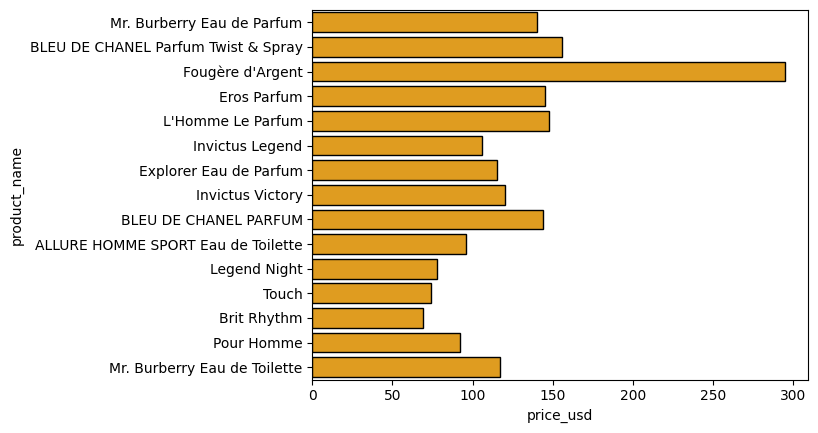

In [37]:
sns.barplot(x= 'price_usd', y= 'product_name', data=query5, color='orange',edgecolor='black')

## 인기있는 top 15 여자향수 top15 과 비교

In [38]:
Fragrance_not_men = pd.read_sql(''' select *
                         from product
                         where primary_category = 'Fragrance'
                         AND secondary_category != 'Men'   ''', product_conn)

Fragrance_not_men

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,None,None,None,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,P504333,Black Opium Perfume Gift Set,1070,Yves Saint Laurent,3844,5.0000,2.0,None,None,None,...,0,0,0,None,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1291,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,None,None,None,...,0,1,0,None,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1292,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,None,None,None,...,1,1,0,None,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1293,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,None,None,None,...,1,1,0,None,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN


In [39]:
Fragrance_not_men.secondary_category.unique()

array(['Value & Gift Sets', 'Women', 'Candles & Home Scents', 'Mini Size'],
      dtype=object)

In [40]:
Fragrance_women = pd.read_sql(''' select *
                         from product
                         where primary_category = 'Fragrance'
                         AND secondary_category = 'Women'   ''', product_conn)

Fragrance_women

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
1,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
2,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,2448,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL Eau de Parfum Spray,...,1,0,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,P504062,Black Opium Le Parfum,1070,Yves Saint Laurent,9007,4.5875,1023.0,3 oz / 90 mL Perfume Spray,Size + Concentration + Formulation,3 oz / 90 mL Perfume Spray parfum spray,...,0,0,0,None,Fragrance,Women,Perfume,3,149.0,34.0
871,P6303,Opium,1070,Yves Saint Laurent,7892,4.2712,177.0,1.6 oz/ 50 mL,Size + Concentration + Formulation,1.6 oz/ 50 mL Eau de Toilette Spray,...,0,0,0,None,Fragrance,Women,Perfume,0,NaN,NaN
872,P504075,Black Opium Le Parfum Travel Spray,1070,Yves Saint Laurent,6686,3.8462,13.0,0.34 oz / 10 mL Perfume Spray,Size + Concentration + Formulation,0.34 oz / 10 mL Perfume Spray parfum spray,...,0,0,1,None,Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
873,P433904,Mon Paris Couture Eau de Parfum,1070,Yves Saint Laurent,5772,4.6512,43.0,1 oz/ 30 mL,Size + Concentration + Formulation,1 oz/ 30 mL,...,0,1,0,['Floral Scent'],Fragrance,Women,Perfume,0,NaN,NaN


In [41]:
women_frag_top15 = pd.read_sql(''' select *
                         from (  select *
                         from product
                         where primary_category = 'Fragrance'
                         AND secondary_category = 'Women'
                        )
                         order by rating desc
                         limit 15 ''', product_conn)
women_frag_top15

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P501696,"002 Neroli, Jasmine and White Amber Eau de Par...",6487,Bon Parfumeur,836,5.0,2.0,0.5 oz / 15 ml,Size + Concentration + Formulation,0.5 oz / 15 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
1,P501728,"001 Orange Blossom, Petitgrain and Bergamot Ea...",6487,Bon Parfumeur,806,5.0,1.0,0.5 oz / 15 ml,Size + Concentration + Formulation,0.5 oz / 15 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
2,P501687,"002 Neroli, Jasmine and White Amber Eau de Parfum",6487,Bon Parfumeur,762,5.0,3.0,3.4 oz / 100 ml,Size + Concentration + Formulation,3.4 oz / 100 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,53.0,34.0
3,P501723,"802 Peony, Lotus and Bamboo Eau de Parfum Trav...",6487,Bon Parfumeur,673,5.0,4.0,1 oz / 30 ml,Size + Concentration + Formulation,1 oz / 30 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,1,34.0,34.0
4,P501715,"801 Sea Spray, Cedar and Grapefruit Eau de Par...",6487,Bon Parfumeur,647,5.0,2.0,0.5 oz / 15 ml,Size + Concentration + Formulation,0.5 oz / 15 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
5,P501699,"802 Peony, Lotus and Bamboo Eau de Parfum",6487,Bon Parfumeur,627,5.0,5.0,3.4 oz / 100 ml,Size + Concentration + Formulation,3.4 oz / 100 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,53.0,34.0
6,P501711,"801 Sea Spray, Cedar and Grapefruit Eau de Parfum",6487,Bon Parfumeur,441,5.0,3.0,3.4 oz / 100 ml,Size + Concentration + Formulation,3.4 oz / 100 ml,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,53.0,34.0
7,P502255,Milk- Personal Travel Spray,7095,Commodity,4666,5.0,5.0,0.34 oz / 10 mL,Size + Concentration + Formulation,0.34 oz / 10 mL perfume spray,...,1,0,1,"['Vegan', 'Unisex/ Genderless Scent', 'Clean a...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
8,P402666,Magnolia Eau de Parfum,7095,Commodity,3195,5.0,13.0,3.4 oz / 100 mL,Size + Concentration + Formulation,3.4 oz / 100 mL eau de parfum spray,...,1,0,1,"['Vegan', 'Unisex/ Genderless Scent', 'Clean a...",Fragrance,Women,Perfume,0,NaN,NaN
9,P501985,Book - Personal,7095,Commodity,1761,5.0,5.0,3.4 oz / 100 mL,Size + Concentration + Formulation,3.4 oz / 100 mL perfume spray,...,0,0,1,"['Vegan', 'Unisex/ Genderless Scent', 'Clean a...",Fragrance,Women,Perfume,1,25.0,25.0


### 가장 인기 있는 브랜드 프로덕트 top 15 (rating기준)

<Axes: xlabel='rating', ylabel='product_name'>

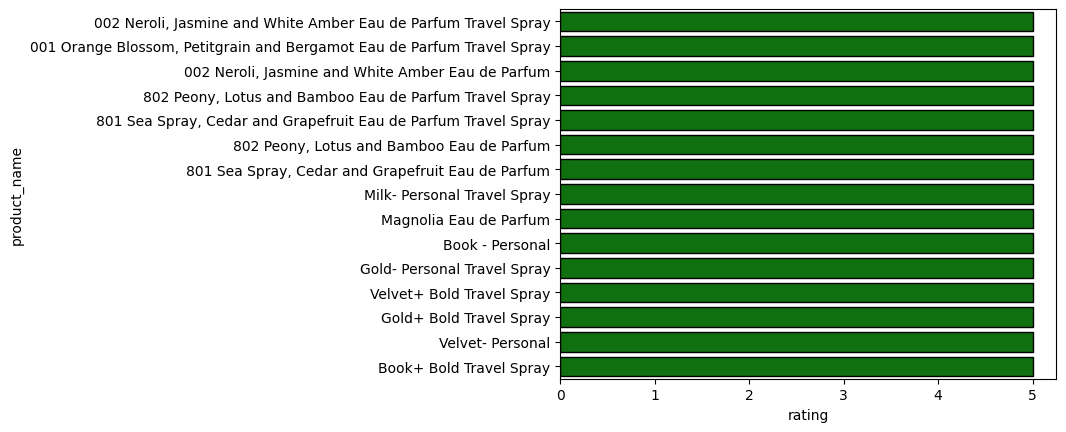

In [42]:
sns.barplot(x= 'rating', y= 'product_name', data=women_frag_top15, color='green',edgecolor='black')

가장 인기있는 top 15 여자 향(none 제외)

<Axes: xlabel='rating', ylabel='highlights'>

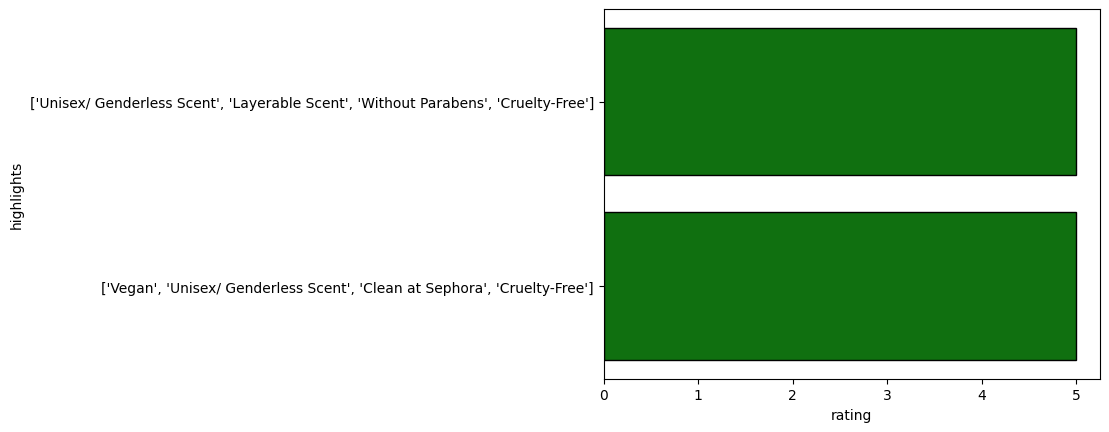

In [ ]:
sns.barplot(x= 'rating', y= 'highlights', data=women_frag_top15, color='green',edgecolor='black')

### 가장 인기있는 top 15 여자 향수 브랜드 rating 확인

남자향수의 인기 브랜드와 극명한 차이가 흥미롭다


<Axes: xlabel='rating', ylabel='brand_name'>

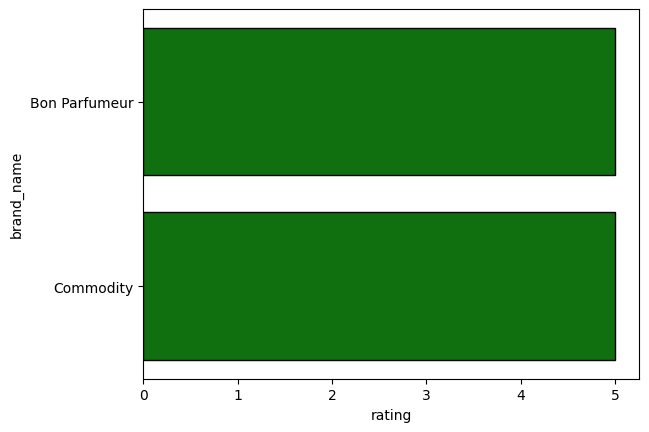

In [43]:
sns.barplot(x= 'rating', y= 'brand_name', data=women_frag_top15, color='green',edgecolor='black')

### 가장 인기있는 top 15 여자 향수 브랜드 가격 분포 확인

여자 향수 보다 남자 향수가 가격 경쟁력에 있어서 훨씬 시장성측면 공략하기 쉬워 보인다,

<Axes: xlabel='price_usd', ylabel='product_name'>

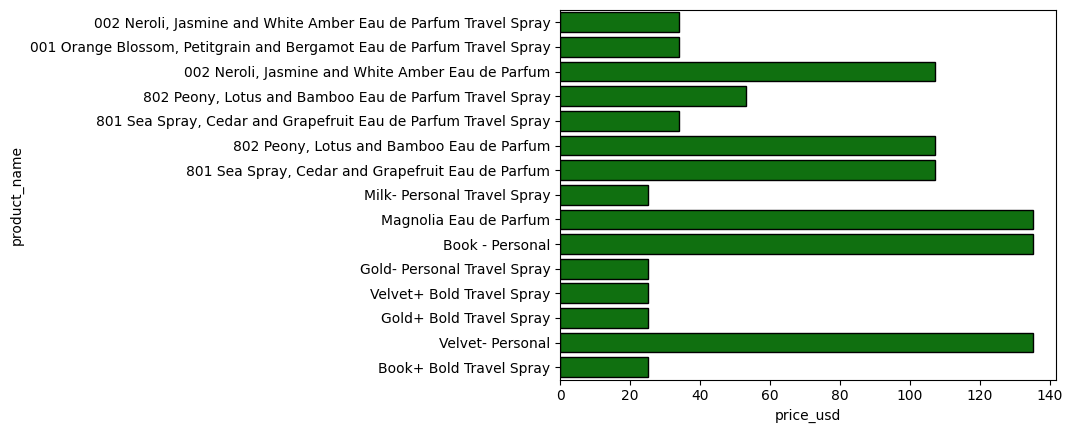

In [44]:
sns.barplot(x= 'price_usd', y= 'product_name', data=women_frag_top15, color='green',edgecolor='black')

## 인기있는 top 15 MEN 향수 성분 분석

In [77]:
df_fragrance = query5

In [50]:
#fragrance_ig = []
#for i in range(len(df_fragrance)):
#  fragrance_ig.append(df_fragrance.ingredients[i])


In [51]:
#fragrance_ig[0]

### 각 프로덕트별 공통으로 들어간 성분

In [52]:
P418386 = pd.DataFrame({'ig' : [
    "Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Ethylhexyl Methoxycinnamate",
"Alpha-Isomethyl Ionone",
"Diethylamino Hydroxybenzoyl Hexyl Benzoate",
"Citronellol",
"BHT",
"Coumarin",
"Citral",
"Gerniol",
"Eugenol",
"Cinnamal",
"CI 19140 (Yellow 5)",
"CI 17200 (Red 33)",
"CI 60730 (EXT. Violet 2)",
"CI 42090 (Blue 1)"
]}) #1

In [53]:
P464219 = pd.DataFrame({'ig' : [
    "Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Citronellol",
"Alpha-Isomethyl Ionone",
"Coumarin",
"Citral",
"Geraniol",
"Benzyl Benzoate",
"Farnesol",
"Benzyl Alcohol",
"Butyl Methoxydibenzoylmethane",
"Ci 60730 (Ext. Violet 2)",
"Ci 15985 (Yellow 6)",
"Ci 19140 (Yellow 5)",
"Il17-1"
]}) #2

In [54]:
P433910 = pd.DataFrame({'ig' : [
    "Alcohol Denat.","Alcohol",
"Fragrance",
"Water",
"Pentaerythrityl Tetra-Di-T-Butyl Hydroxyhydrocinnamate",
"Bht",
"Coumarin",
"Limonene",
"Linalool",
"Citronellol",
"Citral",
"Geraniol",
"Eugenol",
"Cinnamal",
"Farnesol",
"Isoeugenol",
"Benzoic Acid",

]}) #3

In [55]:
P477738 = pd.DataFrame({'ig' : [

"Alcohol Denat","Alcohol",
"Fragrance",
"Water",
"Limonene",
"Coumarin",
"Linalool",
"Alpha-Isomethyl Ionone",
"Citral",
"Citronellol",
"Geraniol",
"Cinnamal",
"Eugenol",
"Alcohol Denat"

]}) #4

In [56]:
P460446 =  pd.DataFrame({'ig' : [

"Alcohol",
"Water",
"Fragrance",
"Limonene",
"Butyl Methoxydibenzoylmethane",
"Hydroxycitronellal",
"Linalool",
"Citronellol",
"Coumarin",
"Geraniol",
"Citral",
"Ci 60730 / Ext. Violet 2",
"Ci 19140 / Yellow 5",
"Ci 14700 / Red 4",
"Ci 42090 / Blue 1."

]}) #5

In [57]:
P445811 = pd.DataFrame({'ig' : [

"Alcohol Denat.","Alcohol",
"Fragrance",
"Water",
"Benzyl Salicylate",
"Linalool",
"Coumarin",
"Limonene",
"Geraniol",
"Butyl Methoxydibenzoylmethane",
"Citronellol",
"Citral",
"Alpha-Isomethyl Ionone",
"Benzyl Benzoate",
"Benzyl Alcohol",
"Benzyl Cinnamate",
"Ci 60730 (Ext. Violet 2).",

 ]}) #6

In [58]:
P450810 = pd.DataFrame({'ig' : [

"Alcohol Denat","Alcohol",
"Fragrance",
"Water",
"Ethylhexyl Methoxycinnamate",
"Butyl Methoxydibenzoylmethane",
"Ethylhexyl Salicylate",
"Bht",
"Citral",
"Limonene",
"Geraniol",
"Linalool",
"Ci 14700 (Red 4)",
"Ci 42090 (Blue 1)",
"Ci 19140 (Yellow 5).",

 ]}) #7

In [59]:
P472051 = pd.DataFrame({'ig' : [
    "Alcohol Denat.","Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Butyl Methoxydibenzoylmethane",
"Coumarin",
"Citronellol",
"Citral",
"Geraniol",
"Isoeugenol."

]}) #8

In [60]:
P432089 = pd.DataFrame({'ig' : [

    "Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Citronellol",
"Alpha-Isomethyl Ionone",
"Coumarin",
"Citral",
"Geraniol",
"Benzyl Benzoate",
"Farnesol",
"Benzyl Alcohol",
"Butyl Methoxydibenzoylmethane",
"Ci 60730 (Ext. Violet 2)",
"Ci 15985 (Yellow 6)",
"Ci 19140 (Yellow 5)",
"Il17-1."

]})

In [61]:
P70400 = pd.DataFrame({'ig' : [

"Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Benzyl Salicylate",
"Alpha-Isomethyl Ionone",
"Citronellol",
"Citral",
"Coumarin",
"Geraniol",
"Il28-1."

]})

In [62]:
P428446 = pd.DataFrame({'ig' : [
    "Alcohol Denat","Alcohol",
"Water",
"Fragrance",
"Butyl Methoxydibenzoylmethane",
"Ethylhexyl Methoxycinnamate",
"Ethylhexyl Salicylate",
"Alpha-Isomethyl Ionone",
"Citral",
"Citronellol",
"Coumarin",
"Limonene",
"Geraniol",
"Hexyl Cinnamal",
"Linalool",
"Bht"

]})

In [63]:
P6986 = pd.DataFrame({'ig' : [

    "Alcohol Denat. (SD Alcohol 39-C)","Alcohol",
"Fragrance",
"Water",
"Limonene",
"Ethylhexyl Methoxycinnamate",
"Coumarin",
"Butylphenyl Methylpropional",
"Linalool",
"Hydroxyisohexyl 3-Cyclohexene Carboxaldehyde",
"Ethylhexl Salicylate",
"Alpha-Isomethyl Ionone",
"Butyl Methoxydibenxoylmethane",
"Citral",
"Cinnamal",
"Citronellol",
"Isoeugenol",
"Eugenol",
"CI 60730 (EXT. Violet 2)",
"CI 19140 (Yellow 5)",
"BHT",
"CI 42090 (Blue 1)",
"CI 14700 (Red 4)",
"CI 17200 (Red 33)",

 ]})

In [64]:
P383082 = pd.DataFrame({'ig' : [

"Alcohol Denat","Alcohol",
"Water",
"Fragrance",
"Limonene",
"Linalool",
"Sutyl Metroxydienenzylmethane",
"Benzyl Salicylate",
"Coumarin",
"Alpha Isomethyl Ionone",
"Hexyl Cinnamal",
"BHT",
"Citral",
"Citronellol",
"Geraniol",
"CI 60730 (Ext. Voilet 2)",
"CI 19140 (Yellow 5)",
"CI 17230 (Red 33)"

 ]})

In [65]:
P219907 = pd.DataFrame({'ig' : [
"Alcohol Denat","Alcohol",
"Fragrance",
"Linalool",
"Water",
"Limonene",
"Ethylhexyl",
"Methoxycinnamate",
"Butyl Methoxydibenzoylmethane",
"Ethylhexyl Salicylate",
"Butyl Methylpropional",
"Alpha-Isomethyl Ionone",
"Citronellol",
"Citral",
"Couramin",
"Geraniol",
"Ci 60730 (Ext. Violet 2)",
"Ci 42090 (Blue I)",
"Ci 19140 (Yellow 5)"

 ]}) #14


In [66]:
P408037 = pd.DataFrame({'ig' : [
    "Alcohol",
"Fragrance",
"Water",
"Limonene",
"Linalool",
"Butyl Methoxydibenzoylmethane",
"Butylphenyl Methylpropional",
"Diethylamino Hydroxybenzoyl Hexyl Benzoate",
"Citronellol",
"Alpha-Isomethyl Ionone",
"BHT",
"Coumarin",
"Citral",
"Gerniol",
"Eugenol",
"Cinnamal",
"CI 17200 (Red 33)",
"CI 42090 (Blue 1)",
"CI 19140 (Yellow 5)",
"CI 60730 (EXT. Violet 2)"

]}) #14

In [94]:
df_fragrance = query5 = pd.read_sql(''' select *
                         from ( select *
                         from df_men
                         where secondary_category = 'Fragrance'
                        )
                         order by rating desc
                         limit 15 ''', men_product_conn)
df_fragrance

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P418386,Mr. Burberry Eau de Parfum,1179,BURBERRY,4527,5.0000,17.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL Eau de Parfum Spray,...,0,0,0,"['Woody & Earthy Scent', 'Layerable Scent']",Men,Fragrance,Cologne,2,179.0,110.0
1,P464219,BLEU DE CHANEL Parfum Twist & Spray,1065,CHANEL,2043,5.0000,2.0,3 x 0.7 oz/ 20.7 mL,Size,3 x 0.7 oz/ 20.7 mL,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
2,P433910,Fougère d'Argent,5869,TOM FORD,2775,5.0000,9.0,1.7 oz / 50 mL,Size + Concentration + Formulation,1.7 oz / 50 mL Eau de Parfum,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
3,P477738,Eros Parfum,2084,Versace,2105,5.0000,7.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Parfum,...,0,0,0,None,Men,Fragrance,Cologne,0,NaN,NaN
4,P460446,L'Homme Le Parfum,1070,Yves Saint Laurent,3812,5.0000,6.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL,...,0,0,0,None,Men,Fragrance,Cologne,1,119.0,119.0
5,P445811,Invictus Legend,1071,Paco Rabanne,3025,4.9474,19.0,3.4oz/100mL,Size + Concentration + Formulation,3.4oz/100mL,...,0,0,0,None,Men,Fragrance,Cologne,1,83.0,83.0
6,P450810,Explorer Eau de Parfum,5606,Montblanc,4658,4.9231,26.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL Eau de Parfum Spray,...,0,0,0,None,Men,Fragrance,Cologne,1,85.0,85.0
7,P472051,Invictus Victory,1071,Paco Rabanne,4060,4.9231,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau De Parfum Spray,...,0,0,0,None,Men,Fragrance,Cologne,1,94.0,94.0
8,P432089,BLEU DE CHANEL PARFUM,1065,CHANEL,11686,4.9091,44.0,1.7oz / 50mL,Size + Concentration + Formulation,1.7oz / 50mL Parfum Spray,...,0,0,0,None,Men,Fragrance,Cologne,1,178.0,178.0
9,P70400,ALLURE HOMME SPORT Eau de Toilette,1065,CHANEL,7900,4.8750,32.0,1.7 oz,Size + Concentration + Formulation,1.7 oz Eau de Toilette Spray,...,0,0,0,None,Men,Fragrance,Cologne,1,120.0,120.0


In [95]:
print(df_fragrance.product_id[14])
print(df_fragrance.ingredients[14])

P408037
['Alcohol, Fragrance, Water, Limonene, Linalool, Butyl Methoxydibenzoylmethane, Butylphenyl Methylpropional, Diethylamino Hydroxybenzoyl Hexyl Benzoate, Citronellol, Alpha-Isomethyl Ionone, BHT, Coumarin, Citral, Gerniol, Eugenol, Cinnamal, CI 17200 (Red 33), CI 42090 (Blue 1), CI 19140 (Yellow 5), CI 60730 (EXT. Violet 2).']


In [96]:
df_fragrance.brand_name.unique()

array(['BURBERRY', 'CHANEL', 'TOM FORD', 'Versace', 'Yves Saint Laurent',
       'Paco Rabanne', 'Montblanc'], dtype=object)

### BURBERRY

In [97]:
df_fragrance.loc[df_fragrance.brand_name=='BURBERRY',:].product_id

0     P418386
11      P6986
12    P383082
14    P408037
Name: product_id, dtype: object

In [98]:
BURBERRY_ig = P418386.merge(P6986, on='ig').merge(P383082, on='ig').merge(P408037, on='ig')
BURBERRY_ig

,ig
0,Alcohol
1,Fragrance
2,Water
3,Limonene
4,Linalool
5,Citronellol
6,BHT
7,Coumarin
8,Citral
9,CI 19140 (Yellow 5)


### CHANEL

In [99]:
df_fragrance.loc[df_fragrance.brand_name=='CHANEL',:].product_id

1    P464219
8    P432089
9     P70400
Name: product_id, dtype: object

In [100]:
CHANEL_ig = P464219.merge(P432089, on='ig').merge(P70400, on='ig')
CHANEL_ig

,ig
0,Alcohol
1,Fragrance
2,Water
3,Limonene
4,Linalool
5,Citronellol
6,Alpha-Isomethyl Ionone
7,Coumarin
8,Citral
9,Geraniol


### TOM FORD

In [101]:
df_fragrance.loc[df_fragrance.brand_name=='TOM FORD',:].product_id

2    P433910
Name: product_id, dtype: object

### Versace

In [102]:
df_fragrance.loc[df_fragrance.brand_name=='Versace',:].product_id

3     P477738
13    P219907
Name: product_id, dtype: object

In [103]:
Versace_ig = P477738.merge(P219907, on='ig')
Versace_ig

,ig
0,Alcohol Denat
1,Alcohol Denat
2,Alcohol
3,Fragrance
4,Water
5,Limonene
6,Linalool
7,Alpha-Isomethyl Ionone
8,Citral
9,Citronellol


### Yves Saint Laurent

In [104]:
df_fragrance.loc[df_fragrance.brand_name=='Yves Saint Laurent',:].product_id

4    P460446
Name: product_id, dtype: object

### Paco Rabanne

In [105]:
df_fragrance.loc[df_fragrance.brand_name=='Paco Rabanne',:].product_id

5    P445811
7    P472051
Name: product_id, dtype: object

In [106]:
Paco_Rabanne_ig = P445811.merge(P472051, on='ig')
Paco_Rabanne_ig

,ig
0,Alcohol Denat.
1,Alcohol
2,Fragrance
3,Water
4,Linalool
5,Coumarin
6,Limonene
7,Geraniol
8,Butyl Methoxydibenzoylmethane
9,Citronellol


### Montblanc

In [107]:
df_fragrance.loc[df_fragrance.brand_name=='Montblanc',:].product_id

6     P450810
10    P428446
Name: product_id, dtype: object

In [108]:
Montblanc_ig = P450810.merge(P428446, on='ig')
Montblanc_ig

,ig
0,Alcohol Denat
1,Alcohol
2,Fragrance
3,Water
4,Ethylhexyl Methoxycinnamate
5,Butyl Methoxydibenzoylmethane
6,Ethylhexyl Salicylate
7,Bht
8,Citral
9,Limonene


### top 15 향수에 공통으로 들어가는 재료는 ?

`Alcohol,Fragrance,Water,Limonene,Linalool,Citral`

In [109]:
BURBERRY_ig.merge(CHANEL_ig, on='ig').merge(P433910, on='ig').merge(Versace_ig, on='ig').merge(P460446, on='ig').merge(Paco_Rabanne_ig, on='ig').merge(Montblanc_ig, on='ig')

,ig
0,Alcohol
1,Fragrance
2,Water
3,Limonene
4,Linalool
5,Citral
